# Projeto Final: Classificação de imagens
<hr>

#### Uso de três redes convolucionais para resolver o problema de classificação entre imagens de gatos e cachorros. <br>

In [ ]:
# utilizando os comando informados no enunciado
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

import os, cv2, numpy as np
import zipfile
from matplotlib import pyplot as plt #importa bilbioteca para criação de gráficos
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Activation
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet152





--2025-04-06 16:49:22--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.207, 172.253.115.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  96.1MB/s    in 0.7s    

2025-04-06 16:49:23 (96.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')



zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') # Diretório com imagens de treinamentos de gatos
train_dogs_dir = os.path.join(train_dir, 'dogs') # Diretório com imagens de treinamentos de cachorros
validation_cats_dir = os.path.join(validation_dir, 'cats') # Diretório com imagens de teste de gatos
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # Diretório com imagens de teste de cachorro

['/tmp/cats_and_dogs_filtered/train/cats', 0]
/tmp/cats_and_dogs_filtered/train/cats
['/tmp/cats_and_dogs_filtered/train/dogs', 1]
/tmp/cats_and_dogs_filtered/train/dogs
['/tmp/cats_and_dogs_filtered/validation/cats', 0]
/tmp/cats_and_dogs_filtered/validation/cats
['/tmp/cats_and_dogs_filtered/validation/dogs', 1]
/tmp/cats_and_dogs_filtered/validation/dogs
Tamanho do conjunto de dados: 3000
Tamanho do conjunto de rótulos: 3000


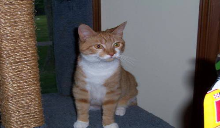

0


In [ ]:
# realizando ajustes nos dados conforme solicitado no enunciado
data = []
labels = []

for a in ([train_cats_dir, 0], [train_dogs_dir, 1], [validation_cats_dir, 0], [validation_dogs_dir, 1]):
  print(a)
  print(a[0])

  for f in os.listdir(a[0]):
    image = cv2.imread(a[0] + '/' + f)
    image = cv2.resize(image, (220, 128))
    data.append(image)
    labels.append(a[1])

print("Tamanho do conjunto de dados:", len(data))
print("Tamanho do conjunto de rótulos:", len(labels))

cv2_imshow(data[780])
print(labels[780])

In [ ]:
# conversão dos dados em array
data = np.array(data, dtype = "float")
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(3000, 128, 220, 3)
(3000,)


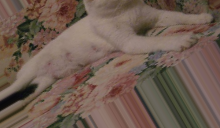

1000
1000


In [ ]:
# criando 1000 imagens usando data augmentation com os parâmetros passados no enunciado

aug = ImageDataGenerator(
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    rotation_range=45)

imageGen = aug.flow(data, labels, batch_size=1)

data2 = []
labels2 = []

for i in range(1000):
  image, label = imageGen.__next__()

  data2.append(image[0,:,:,:])

  if i == 10:
    cv2_imshow(image[0,:,:,:])

  labels2.append(label)
print(len(data2))
print(len(labels2))

In [ ]:
# juncao das imagens geradas com os demais dados

data2 = np.array(data2)
data3 = np.append(data2, data, axis=0)
print(data.shape, data2.shape, data3.shape)

labels2 = np.array(labels2)
labels3 = np.append(labels2, labels)
print(labels.shape, labels2.shape, labels3.shape)

(3000, 128, 220, 3) (1000, 128, 220, 3) (4000, 128, 220, 3)
(3000,) (1000, 1) (4000,)


In [ ]:
# realizando a divisão entre treino e teste
(trainX, testX, trainY, testY) = train_test_split(data3, labels3, test_size=0.30)

print(trainX.shape)
print(trainY.shape)

(2800, 128, 220, 3)
(2800,)


In [ ]:
#iniciando a preparação das redes

vgg16Model = VGG16(weights=None, classifier_activation='softmax', input_shape=(128, 220, 3), classes=2)
vgg19Model = VGG19(weights=None, input_shape=(128, 220, 3), classes=2)
resnetModel = ResNet152(weights=None, input_shape=(128, 220, 3), classes=2)

In [ ]:
vgg16Model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 220, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 220, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 220, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 110, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 110, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 110, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 55, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 55, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 55, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 55, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 27, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 27, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 27, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 13, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 13, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 13, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 13, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │      50,335,744 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 81,839,938 (312.19 MB)

 Trainable params: 81,839,938 (312.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg19Model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 220, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 220, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 220, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 110, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 110, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 110, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 55, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 55, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 55, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 55, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 55, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 27, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 27, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 27, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 27, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 13, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 13, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 13, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 13, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 13, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 87,149,634 (332.45 MB)

 Trainable params: 87,149,634 (332.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resnetModel.summary()

Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 220, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 226, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 110, 64)    │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 110, 64)    │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 110, 64)    │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 112, 64)    │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 55, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 55, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 55, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 55, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 55, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 55, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 55, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 55, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 55, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 58,375,042 (222.68 MB)

 Trainable params: 58,223,618 (222.11 MB)

 Non-trainable params: 151,424 (591.50 KB)

### Pergunta 1:
O número de parâmetros treináveis da VGG16 é:

81,839,938

### Pergunta 2:
O número de parâmetros treináveis da VGG19 é:

87,149,634

### Pergunta 3:
O número de parâmetros treináveis da ResNet é:

58,223,618

### Pergunta 4:
Ao utilizar o método.shape após o método train_test_split, o resultado que corresponde ao X do treino é:

 (2800, 128, 220, 3)

### Pergunta 5:
Ao utilizar o método.shape após o método train_test_split, o resultado que corresponde ao Y do treino é:

In [ ]:
print(trainY.shape)

(2800,)


### Pergunta 6:
O número de parâmetros treináveis na quinta camada convolucional da VGG19 é:

In [ ]:
quinta_conv_layer = vgg19Model.layers[7].output

model_quinta_conv = Model(inputs=vgg19Model.input, outputs=quinta_conv_layer)

print(model_quinta_conv.count_params())

555328


### Pergunta 7:
O shape de saída da quinta camada convolucional da VGG19 é:

In [ ]:
print(model_quinta_conv.output_shape)

(None, 32, 55, 256)


### Pergunta 8:
O método to_categorical é aplicado:


Aos labels dos conjuntos de treino e teste.

### Pergunta 9:
 A rede mais profunda criada é a:

ResNet

### Pergunta 10:
O parâmetro width_shift_range foi definido como:

0.2.

### Pergunta 11:
O método utilizado para converter lista de elementos em array foi o:

numpy.array

### Pergunta 12:
A divisão dos elementos de treino por 255 é aplicado:

Para normalizar os valores das amostras entre 0 e 1.

### Pergunta 13:
O método utilizado para treinar os modelos é o:

Fit.

### Pergunta 14:
O código mais possível de ser aplicável para se definir o conjunto de teste durante o treinamento é:

validation_data=(testX, np_utils.to_categorical(testY)).